# **Learning Best Practices for Model Evaluation and Hyperparameter Tuning**

**Outline**

- Streamlining workflows with pipelines
    - Loading the Breast Cancer Wisconsin dataset
    - Combining transformers and estimators in a pipeline

- Using k-fold cross-validation to assess model performance
    - The holdout method
    - K-fold cross-validation

- Debugging algorithms with learning and validation curves
    - Diagnosing bias and variance problems with learning curves
    - Addressing over- and underfitting with validation curves

- Fine-tuning machine learning models via grid search
    - Tuning hyperparameters via grid search
    - Exploring hyperparameter configurations more widely with randomized search
    - More resource-efficient hyperparameter search with successive halving
    - Algorithm selection with nested cross-validation

- Looking at different performance evaluation metrics
    - Reading a confusion matrix
    - Optimizing the precision and recall of a classification model
    - Plotting a receiver operating characteristic
    - Scoring metrics for multiclass classification

- Dealing with class imbalance

## **Streamlining workflows with pipelines**

- Pipeline class in scikit-learn, which allows us to fit a model including an arbitrary number of transformation steps and apply it to make predictions about new data

---


In [1]:
from IPython.display import Image
%matplotlib inline

### **Loading the Breast Cancer Wisconsin dataset**

- We will be working with the `Breast Cancer Wisconsin` dataset, which contains `569` examples of `malignant` and `benign` tumor cells. The first two columns in the dataset store the unique ID numbers of the examples and the corresponding diagnoses (M = malignant, B = benign), respectivey. 

- Columns 3-32 contain 30 real-valued features that have been computed from digitized images of the cell nuclei, which can be used to build a model to predict whether a tumor is benign or malignant.

In [18]:
import pandas as pd

breast_cancer_wisconsin_dataset_path = "../data/brca.csv"

df = pd.read_csv(breast_cancer_wisconsin_dataset_path)
df.head()

,Unnamed: 0,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,1,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
1,2,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
2,3,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
3,4,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
4,5,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B


In [19]:
df.columns

Index(['Unnamed: 0', 'x.radius_mean', 'x.texture_mean', 'x.perimeter_mean',
       'x.area_mean', 'x.smoothness_mean', 'x.compactness_mean',
       'x.concavity_mean', 'x.concave_pts_mean', 'x.symmetry_mean',
       'x.fractal_dim_mean', 'x.radius_se', 'x.texture_se', 'x.perimeter_se',
       'x.area_se', 'x.smoothness_se', 'x.compactness_se', 'x.concavity_se',
       'x.concave_pts_se', 'x.symmetry_se', 'x.fractal_dim_se',
       'x.radius_worst', 'x.texture_worst', 'x.perimeter_worst',
       'x.area_worst', 'x.smoothness_worst', 'x.compactness_worst',
       'x.concavity_worst', 'x.concave_pts_worst', 'x.symmetry_worst',
       'x.fractal_dim_worst', 'y'],
      dtype='object')

In [20]:
df.shape

(569, 32)

In [22]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df.shape

(569, 31)

In [44]:
df.head()

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
1,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
2,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
3,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
4,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B


In [47]:
df['y'].unique()

array(['B', 'M'], dtype=object)

- Next, we will assign the `30 features` to a NumPy array, `X`. Using a `LabelEncoder` object, we will transform the class labels from their original string representation ('M' and 'B') into integers:

In [56]:
from sklearn.preprocessing import LabelEncoder

X = df.drop('y', axis=1).values
y = df['y'].values

X.shape, y.shape

((569, 30), (569,))

In [57]:
X, y

(array([[1.354e+01, 1.436e+01, 8.746e+01, ..., 1.288e-01, 2.977e-01,
         7.259e-02],
        [1.308e+01, 1.571e+01, 8.563e+01, ..., 7.283e-02, 3.184e-01,
         8.183e-02],
        [9.504e+00, 1.244e+01, 6.034e+01, ..., 6.227e-02, 2.450e-01,
         7.773e-02],
        ...,
        [2.013e+01, 2.825e+01, 1.312e+02, ..., 1.628e-01, 2.572e-01,
         6.637e-02],
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01]]),
 array(['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
        'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
        'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
        'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
        'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
        'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       

In [58]:
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

- After encoding the class labels (diagnosis) in an array, y, the `malignant` tumors are now represented as `class 1`, and the benign tumors are represented as `class 0`, respectively. We can double-check this mapping by calling the transform method of the fitted `LabelEncoder` on two dummy class labels:

In [59]:
le.transform(['M', 'B'])

array([1, 0])

- Let's divide the dataset into a separate training dataset (80 percent of the data) and a separate test dataset (20 percent of the data):

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.20,
                     stratify=y,
                     random_state=1)

In [61]:
X_train.shape, X_test.shape

((455, 30), (114, 30))

### **Combining transformers and estimators in a pipeline**

- Standardize the columns in the Breast Cancer Wisconsin dataset before we feed them to a linear classifier, such as logistic regression.

- Let's assume we want to compress our data from the initial `30` dimensions into a lower two-dimensional subspace via `principal component analysis (PCA)`, a feature extraction technique for dimensionality reduction.

- Instead of going through the model fitting and data transformation steps for the training and test datasets separately, we can chain the `StandardScaler`, `PCA`, and `LogisticRegression` objects in a Pipeline:

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression())

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
test_acc = pipe_lr.score(X_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')

Test accuracy: 0.956


- The `make_pipeline` function takes an arbitrary number of scikit-learn transformers (objects that support the fit and transform methods as input), followed by a scikit-learn estimator that implements the fit and predict methods.

- In our preceding code example, we provided two scikit-learn transformers, `StandardScaler` and `PCA`, and a `LogisticRegression` estimator as inputs to the `make_pipeline` function, which constructs a scikit-learn Pipeline object from these objects.

- We can think of a scikit-learn Pipeline as a meta-estimator or wrapper around those individual transformers and estimators. If we call the fit method of Pipeline, the data will be passed down a series of transformers via fit and transform calls on these intermediate steps until it arrives at the estimator object (the final element in a pipeline). The estimator will then be fitted to the transformed training data.

- When we executed the fit method on the `pipe_lr` pipeline in the preceding code example, `StandardScaler` first performed fit and transform calls on the training data. Second, the transformed training data was passed on to the next object in the pipeline, PCA. Similar to the previous step, `PCA` also executed fit and transform on the scaled input data and passed it to the final element of the pipeline, the estimator.

- Finally, the `LogisticRegression` estimator was fit to the training data after it underwent transformations via `StandardScaler` and `PCA`. Again, we should note that there is no limit to the number of intermediate steps in a pipeline; however, if we want to use the pipeline for prediction tasks, the last pipeline element has to be an estimator.


![Pipeline Object](./figures/pipeline-object.png)

## **Using k-fold cross validation to assess model performance**

- common cross-validation techniques `holdout cross-validation` and `k-fold cross-validation`, which can help us to obtain reliable estimates of the model's generalization performance, that is, how well the model performs on unseen data.

--

### **The holdout method**

- A classic and popular approach for estimating the generalization performance of machine learning models is the `holdout method`. Using the `holdout method`, we split our initial dataset into separate training and test datasets—the former is used for model training, and the latter is used to estimate its generalization performance. However, in typical machine learning applications, we are also interested in tuning and comparing different parameter settings to further improve the performance for making predictions on unseen data. This process is called `model selection`, with the name referring to a given classification problem for which we want to select the optimal values of tuning parameters (also called hyperparameters). However, if we reuse the same test dataset over and over again during model selection, it will become part of our training data and thus the model will be more likely to
overfit. Despite this issue, many people still use the test dataset for model selection, which is not a good machine learning practice.


- A better way of using the holdout method for model selection is to separate the data into three parts:
    - a training dataset, 
    - a validation dataset, and 
    - a test dataset. 

The training dataset is used to fit the different models, and the performance on the validation dataset is then used for model selection. The advantage of having a test dataset that the model hasn’t seen before during the training and model selection steps is that we can obtain a less biased estimate of its ability to generalize to new data. 

The figure below illustrates the concept of holdout cross-validation, where we use a validation dataset to repeatedly evaluate the performance of the model after training using different hyperparameter values. Once we are satisfied with the tuning of hyperparameter values, we estimate the model’s generalization performance on the test dataset:


![Training, validation and test datasets](./figures/training-validation-test-dataset.png)

- A disadvantage of the holdout method is that the performance estimate may be very sensitive to how we partition the training dataset into the training and validation subsets; the estimate will vary for different examples of the data.

### **K-fold cross-validation**

- In `k-fold cross-validation`, we randomly split the training dataset into `k` folds without replacement. Here, `k - 1` folds, the so-called training folds, are used for the model training, and one fold, the so-called test fold, is used for performance evaluation. This procedure is repeated `k` times so that we obtain `k` models and performance estimates.


- We then calculate the average performance of the models based on the different, independent test folds to obtain a performance estimate that is less sensitive to the sub-partitioning of the training data compared to the holdout method. Typically, we use k-fold cross-validation for model tuning, that is, finding the optimal hyperparameter values that yield a satisfying generalization performance, which is estimated from evaluating the model performance on the test folds.


- Once we have found satisfactory hyperparameter values, we can retrain the model on the complete training dataset and obtain a final performance estimate using the independent test dataset. The rationale behind fitting a model to the whole training dataset after `k-fold cross-validation` is that first, we are typically interested in a single, final model (versus k individual models), and second, providing more training examples to a learning algorithm usually results in a more accurate and robust model.


- Since `k-fold cross-validation` is a resampling technique without replacement, the advantage of this approach is that in each iteration, each example will be used exactly once, and the training and test folds are disjoint. Furthermore, all test folds are disjoint; that is, there is no overlap between the test folds. 

- The figure below summarizes the concept behind k-fold cross-validation with `k = 1`. The training dataset is divided into `10 folds`, and during the 10 iterations, 9 folds are used for training, and 1 fold will be used as the test dataset for model evaluation.

Also, the estimated performance, $E_{i}$ (classification accuracy or error), for each fold are then used to calculate the estimated average performance, $E$, of the model.


![k-fold cross-validation](./figures/k-fold-cross-validation.png)


- In summary, `k-fold cross-validation` makes better use of the dataset than the holdout method with a validation set, since in `k-fold cross validation` all data points are being used for evaluation.

- A good standard value for `k` in `k-fold cross-validation` is `10`, as empirical evidence shows. For instance, experiments by Ron Kohavi on various real-world datasets suggest that 10-fold cross-validation offers the best tradeoff between bias and variance.

- However, if we are working with relatively small training sets, it can be useful to increase the number of folds. On the other hand, if we are working with large datasets, we can choose a smaller value for `k`, for example, `k = 5`, and still obtain an accurate estimate of the avergae performance of the model while reducing the computational cost of refitting and evaluating the model on the different folds. 

- A slight improvement over the standard `k-fold cross-validation` approach is `stratified k-fold cross-validation`, which can yield better bias and variance estimates, especially in cases of unequal class proportions.

- In stratified cross-validation, the class label proportions are preserved in each fold to ensure that each fold is representative of the class proportions in the training dataset, which we will illustrate by using the `StratifiedKFold` iterator in scikit-learn:

In [73]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)
scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    
    print(f'Fold: {k+1:02d}, '
        f'Class distr.: {np.bincount(y_train[train])}, '
        f'Acc.: {score:.3f}')

Fold: 01, Class distr.: [256 153], Acc.: 0.935
Fold: 02, Class distr.: [256 153], Acc.: 0.935
Fold: 03, Class distr.: [256 153], Acc.: 0.957
Fold: 04, Class distr.: [256 153], Acc.: 0.957
Fold: 05, Class distr.: [256 153], Acc.: 0.935
Fold: 06, Class distr.: [257 153], Acc.: 0.956
Fold: 07, Class distr.: [257 153], Acc.: 0.978
Fold: 08, Class distr.: [257 153], Acc.: 0.933
Fold: 09, Class distr.: [257 153], Acc.: 0.956
Fold: 10, Class distr.: [257 153], Acc.: 0.956


In [74]:
mean_acc = np.mean(scores)
std_acc = np.std(scores)
print(f'\nCV accuracy: {mean_acc:.3f} +/- {std_acc:.3f}')


CV accuracy: 0.950 +/- 0.014


- First, we initialized the `StratifiedKFold` iterator from the `sklearn.model_selection` module with the `y_train` class labels in the training dataset, and we specified the number of folds via the `n_splits` parameter. When we used the kfold iterator to loop through the k folds, we used the returned indices in train to fit the `logistic regression` pipeline that we set up at the beginning. Using the `pipe_lr pipeline`, we ensured that the examples were scaled properly (for instance, standardized) in each iteration. We then used the test indices to calculate the accuracy score of the model, which we collected in the scores list to calculate the average accuracy and the standard deviation of the estimate.

- Although the previous code example was useful to illustrate how k-fold cross-validation works, scikit- learn also implements a `k-fold cross-validation scorer`, which allows us to evaluate our model using stratified k-fold cross-validation less verbosely:

In [75]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print(f'CV accuracy scores: {scores}')

CV accuracy scores: [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]


In [76]:
print(f'CV accuracy: {np.mean(scores):.3f} '
      f'+/- {np.std(scores):.3f}')

CV accuracy: 0.950 +/- 0.014


- An extremely useful feature of the `cross_val_score` approach is that we can distribute the evaluation of the different folds across multiple `central processing units (CPUs)` on our machine. If we set the `n_jobs` parameter to 1, only one CPU will be used to evaluate the performances, just like in our `StratifiedKFold` example previously. However, by setting `n_jobs=2`, we could distribute the `10 rounds` of cross-validation to two CPUs (if available on our machine), and by setting `n_jobs=-1`, we can use
all available CPUs on our machine to do the computation in parallel.

## **Debugging algorithms with learning and validation curves**

In this section, we will take a look at two very simple yet powerful diagnostic tools that can help us to improve the performance of a learning algorithm: `learning curves` and `validation curves`. In the next subsections, we will discuss how we can use learning curves to diagnose whether a learning algorithm has a problem with `overfitting (high variance)` or `underfitting (high bias)`. Furthermore, we will take a look at validation curves, which can help us to address the common issues of learning algorithms.


### **Diagnosing bias and variance problems with learning curves**

- If a model is too complex for a given training dataset—for example, think of a very deep decision tree—the model tends to overfit the training data and does not generalize well to unseen data. Often, it can help to collect more training examples to reduce the degree of overfitting.


- However, in practice, it can often be very expensive or simply not feasible to collect more data. By plotting the model training and validation accuracies as functions of the training dataset size, we can easily detect whether the model suffers from `high variance` or `high bias`, and whether the collection of more data could help to address this problem.

![Common model issues](./figures/common-model-issues.png)


- The graph in the upper left shows a model with a `high bias`. This model has both `low training` and `cross-validation accuracy`, which indicates that it underfits the training data. Common ways to address this issue are to increase the number of model parameters, for example, by collecting or constructing additional features, or by decreasing the degree of regularization, for example, in support vector machine (SVM) or logistic regression classifiers.


- The graph in the upper-right shows a model that suffers from high variance, which is indicated by the large gap between the training and cross-validation accuracy. To address this problem of overfitting, we can collect more training data, reduce the complexity of the model, or increase the regularization parameter, for example.


- For unregularized models, it can also help to decrease the number of features via `feature selection` or `feature extraction`  to decrease the degree of overfitting. While collecting more training data usually tends to decrease the chance of overfitting, it may not always help, for example, if the training data is extremely noisy or the model is already very close to optimal.

- How we can use the learning curve function from scikit-learn to evaluate the model:

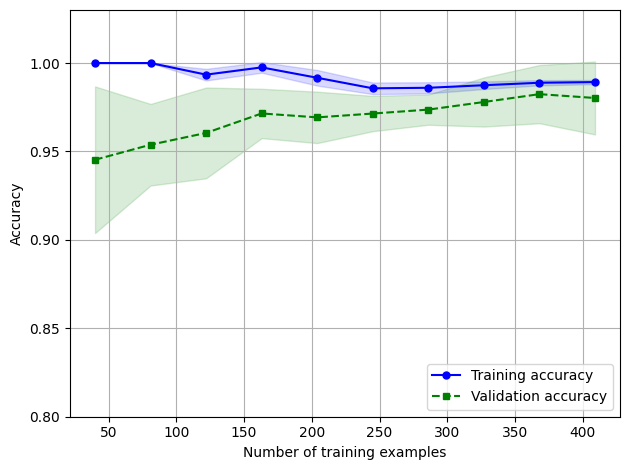

In [78]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2',
                                           max_iter=10000))

train_sizes, train_scores, test_scores =\
                    learning_curve(estimator=pipe_lr,
                                   X=X_train,
                                   y=y_train,
                                   train_sizes=np.linspace(
                                       0.1, 1.0, 10
                                   ),
                                   cv=10,
                                   n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, 
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
# plt.savefig('figures/06_05.png', dpi=300)
plt.show()

- Note that we passed `max_iter=10000` as an additional argument when instantiating the `LogisticRegression` object (which uses 1,000 iterations as a default) to avoid convergence issues for the smaller dataset sizes or extreme regularization paramter values. 

- Via the `train_sizes` parameter in the learning_curve function, we can control the absolute or relative number of training examples that are used to generate the learning curves. Here, we set `train_sizes=np.linspace(0.1, 1.0, 10)` to use `10` evenly spaced, relative intervals for the training dataset sizes. By default, the `learning_curve` function uses stratified `k-fold cross-validation` to calculate the cross-validation accuracy of a classifier, and we set `k=10` via the cv parameter for 10-fold
stratified cross-validation.


- Then, we simply calculated the average accuracies from the returned `cross-validated` training and test scores for the different sizes of the training dataset, which we plotted using Matplotlib’s plot function. Furthermore, we added the standard deviation of the average accuracy to the plot using the `fill_between` function to indicate the variance of the estimate.


- As we can see in the preceding learning curve plot, our model performs quite well on both the `training` and `validation` datasets if it has seen more than `250` examples during training. We can also see that the training accuracy increases for training datasets with fewer than `250` examples, and the gap between validation and training accuracy widens—an indicator of an increasing degree of overfitting.

### **Addressing over- and underfitting with validation curves**

- Validation curves are a useful tool for improving the performance of a model by addressing issues such as `overfitting` or `underfitting`. Validation curves are related to learning curves, but instead of plotting the training and test accuracies as functions of the sample size, we vary the values of the model parameters, for example, the `inverse regularization parameter`, C, in logistic regression.

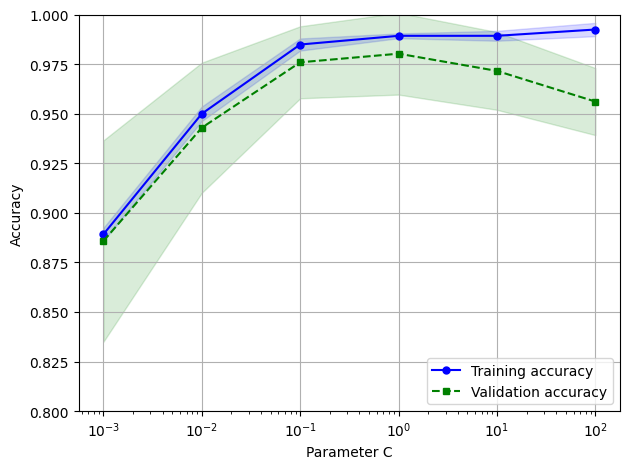

In [82]:
from sklearn.model_selection import validation_curve

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
                             estimator=pipe_lr,
                             X=X_train,
                             y=y_train,
                             param_name='logisticregression__C',
                             param_range=param_range,
                             cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, 
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
# plt.savefig('figures/06_06.png', dpi=300)
plt.show()

- Similar to the `learning_curve` function, the `validation_curve` function uses `stratified k-fold cross-validation` by default to estimate the performance of the classifier. Inside the `validation_curve` function, we specified the parameter that we wanted to evaluate. In this case, it is `C`, the inverse regularization parameter of the LogisticRegression classifier, which we wrote as `'logisticregression__C'` to access the LogisticRegression object inside the scikit-learn pipeline for a specified value range that we set via the `param_range` parameter. Similar to the learning curve example in the previous section, we plotted the `average training` and `cross-validation` accuracies and the corresponding standard deviations.


- Although the differences in the accuracy for varying values of `C` are subtle, we can see that the model slightly underfits the data when we increase the regularization strength (small values of C). However, for large values of C, it means lowering the strength of regularization (large values of C), so the model tends to slightly overfit the data. In this case, the sweet spot appears to be between `0.01 and 0.1` of the C value.

## **Fine-tuning machine learning models via grid search**

- In machine learning, we have two types of parameters: those that we learned from the training data, for example, the `weights` in logistic regression, and the parameters of a learning algorithm that are optimized separately. The latter are the tuning parameters (or `hyperparameters`) of a model, for example, the regularization parameter in logistic regression or the maximum depth parameter of a decision tree.

- In the previous section, we used `validation curves` to improve the performance of a model by tuning one of its `hyperparameters`. In this section, we will take a look at a popular hyperparameter optimization technique called `grid search`, which can further help to improve the performance of a model by finding the optimal combination of hyperparameter values.

### **Tuning hyperparameters via grid search**

- The `grid search` approach is quite simple: it's a brute-force exhaustive search paradigm where we specify a list of values for different hyperparameters, and the computer evaluates the model performance for each combination to obtain the optimal combination of values from this set:

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svc__C': param_range,
               'svc__kernel': ['linear']},
              {'svc__C': param_range,
               'svc__gamma': param_range,
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10, 
                  refit=True,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)

0.9846859903381642


In [84]:
print(gs.best_params_)

{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


- Using the preceding code, we initialized a `GridSearchCV` object from the `sklearn.model_selection` module to train and tune an SVM pipeline. We set the `param_grid` parameter of `GridSearchCV` to a list of dictionaries to specify the parameters that we’d want to tune. For the linear SVM, we only evaluated the `inverse regularization parameter`, C; for the `radial basis function (RBF)` kernel SVM, we tuned both the `svc__C` and `svc__gamma` parameters. Note that the `svc__gamma` parameter is specific to kernel SVMs.


- `GridSearchCV` uses `k-fold` cross-validation for comparing models trained with different hyperparameter settings. Via the `cv=10` setting, it will carry out `10-fold` cross-validation and compute the average accuracy `(via scoring='accuracy')` across these `10-folds` to assess the model performance. We set `n_jobs=-1` so that `GridSearchCV` can use all our processing cores to speed up the grid search by fitting models to the different folds in parallel, but if your machine has problems with this setting, you may change this setting to `n_jobs=None` for single processing.


- After we used the training data to perform the grid search, we obtained the score of the best-performing model via the `best_score_` attribute and looked at its parameters, which can be accessed via the `best_params_` attribute. In this particular case, the `RBF kernel` SVM model with `svc__C = 100.0` yielded the best k-fold cross-validation accuracy: `98.5` percent.

In [85]:
clf = gs.best_estimator_
print(f'Test accuracy: {clf.score(X_test, y_test):.3f}')

Test accuracy: 0.974


### **Exploring hyperparameter configurations more widely with randomized search**

- Since grid search is an exhaustive search, it is guaranteed to find the optimal hyperparameter configuration if it is contained in the user-specified parameter grid. However, specifying large hyperparameter grids makes grid search very expensive in practice.

- An alternative approach for sampling different parameter combinations is randomized search. In randomized search, we draw hyperparameter configurations randomly from distributions (or discrete sets).

- In contrast to `grid search`, `randomized search` does not do an exhaustive search over the hyperparameter space. Still, it allows us to explore a wider range of hyperparameter value settings in a more cost-and time-effective manner.


![Grid Search and Randomized Search](./figures/grid-randomized-search.png)


- The main takeaway is that while `grid search` only explores discrete, user-specified choices, it may miss good hyperparameter configurations if the search space is too scarce.

- Let’s look at how we can use randomized search for tuning an SVM. Scikit-learn implements a `RandomizedSearchCV` class, which is analogous to the `GridSearchCV` we used in the previous subsection. The main difference is that we can specify distributions as part of our parameter grid and specify the total number of hyperparameter configurations to be evaluated.

In [102]:
# We can as well use this distribution for `RandomizedSearchCV`
import scipy
param_range = scipy.stats.loguniform(0.0001, 1000.0)
param_range.rvs(10)

array([8.30145146e-02, 1.10222804e+01, 1.00184520e-04, 1.30715777e-02,
       1.06485687e-03, 4.42965766e-04, 2.01289666e-03, 2.62376594e-02,
       5.98924832e-02, 5.91176467e-01])

In [103]:
from sklearn.model_selection import RandomizedSearchCV
import scipy


pipe_svc = make_pipeline(
    StandardScaler(),
    SVC(random_state=1))

# param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_range = scipy.stats.loguniform(0.0001, 1000.0)
param_range.rvs(10)


param_grid = [{'svc__C': param_range,
               'svc__kernel': ['linear']},
              {'svc__C': param_range,
               'svc__gamma': param_range,
               'svc__kernel': ['rbf']}]


rs = RandomizedSearchCV(estimator=pipe_svc,
                        param_distributions=param_grid,
                        scoring='accuracy',
                        refit=True,
                        n_iter=20,
                        cv=10,
                        random_state=1,
                        n_jobs=-1)

In [104]:
rs = rs.fit(X_train, y_train)
print(rs.best_score_)

0.9780676328502416


In [105]:
print(rs.best_params_)

{'svc__C': np.float64(0.05971247755848463), 'svc__kernel': 'linear'}


- Based on the code example, we can see that the usage is very similar to `GridSearchCV`, except that we could use distributions for specifying parameter ranges and specified the number of iterations by setting `n_iter=20`.


### **More resource-efficient hyperparameter search with successive halving**

Taking the idea of randomized search one step further, scikit-learn implements a successive halving variant, `HalvingRandomSearchCV`, that makes finding suitable hyperparameter configurations more efficient. Successive halving, given a large set of candidate configurations, successively throws out unpromising hyperparameter configurations until only one configuration remains. We can summarize the procedure via the following steps:


- Draw a large set of candidate configurations via random sampling
- Train the models with limited resources, for example, a small subset of the training data (as opposed to using the entire training set).
- Discard the bottom 50 percent based on predictive performance.
- Go back to `step 2` with an increased amount of available resources.

The steps are repeated until only one hyperparameter configuration remains. Note that there is also a successive halving implementation for the grid search variant called `HalvingGridSearchCV`, where all specified hyperparameter configurations are used in `step 1` instead of random samples.

In [106]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

In [107]:
hs = HalvingRandomSearchCV(
    pipe_svc,
    param_distributions=param_grid,
    n_candidates='exhaust',
    resource='n_samples',
    factor=1.5,
    random_state=1,
    n_jobs=-1)

- The `resource='n_samples' (default)` setting specifies that we consider the training set size as the resource we vary between the rounds. Via the factor parameter, we can determine how many candidates are eliminated in each round. For example, setting `factor=2` eliminates half of the candidates, and setting `factor=1.5` means that only `100%/1.5 ≈ 66%` of the candidates make it into the next round. 


- Instead of choosing a fixed number of iterations as in `RandomizedSearchCV`, we set `n_candidates='exhaust' (default)`, which will sample the number of hyperparameter configurations such that the maximum number of resources (here: training examples) are used in the last round.


- We can then carry out the search similar to `RandomizedSearchCV`:

In [108]:
hs = hs.fit(X_train, y_train)
print(hs.best_score_)
print(hs.best_params_)

0.9617647058823529
{'svc__C': np.float64(4.934834261073333), 'svc__kernel': 'linear'}


In [109]:
clf = hs.best_estimator_
print(f'Test accuracy: {hs.score(X_test, y_test):.3f}')

Test accuracy: 0.982


- If we compare the results from `GridSearchCV` and `RandomizedSearchCV` from the previous two subsections with the model from `HalvingRandomSearchCV`, we can see that the latter yields a model that performs slightly better on the test set (`98.2 percent` accuracy as opposed to `97.4 percent`).

### **Algorithm selection with nested cross-validation**

- Using `k-fold` cross-validation in combination with grid search or randomized search is a useful approach for fine-tuning the performance of a machine learning model by varing its hyperparameter values. 

- If we want to select among different machine learning algorithms, though, another recommended approach is `nested cross-validation`.

- In nested cross-validation, we have an outer `k-fold cross-validation` loop to split the data into training and test folds, and an inner loop is used to select the model using `k-fold cross-validation` on the training fold.

- After model selection, the test fold is then used to evaluate the model performance. The figure below explains the concept of nested cross-validation with only five outer and two inner folds, which can be useful for large datasets where computational performance is important; this particular type of nested cross-validation is also known as `5x2 cross-validation`:


![Nested Cross-Validation](./figures/nested-cross-validation.png)


- In scikit-learn, we can perform nested cross-validation with grid search as follows:

In [110]:
param_range = [0.0001, 0.001, 0.01, 0.1,
               1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svc__C': param_range,
               'svc__kernel': ['linear']},
              {'svc__C': param_range,
               'svc__gamma': param_range,
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=2)

scores = cross_val_score(gs, X_train, y_train, 
                         scoring='accuracy', cv=5)
print(f'CV accuracy: {np.mean(scores):.3f} '
      f'+/- {np.std(scores):.3f}')

CV accuracy: 0.974 +/- 0.015


- The returned average cross-validation accuracy gives us a good estimate of what to expect if we tune the hyperparameters of a model and use it on unseen data.

- For example, we can use the nested `cross-validation` approach to compare an `SVM model` to a simple decision tree classifier; for simplicity, we will only tune its depth parameter:

In [111]:
from sklearn.tree import DecisionTreeClassifier

gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}],
                  scoring='accuracy',
                  cv=2)

scores = cross_val_score(gs, X_train, y_train, 
                         scoring='accuracy', cv=5)
print(f'CV accuracy: {np.mean(scores):.3f} '
      f'+/- {np.std(scores):.3f}')

CV accuracy: 0.934 +/- 0.016


- As we can see, the nested cross-validation performance of the `SVM model (97.4 percent)` is notably better than the performance of the `decision tree (93.4 percent)`, and thus, we’d expect that it might be the better choice to classify new data that comes from the same population as this particular dataset.

## **Looking at different performance evaluation metrics**

In the previous sections, we evaluated different machine learning models using prediction accuracy, which is a useful metric with which to quantify the performance of a model in general. However, there are several other performance metrics that can be used to measure a model's relevance, such as `precision`, `recall`, the `F1 score`, and `Matthews correlation coefficient (MCC)`.

### **Reading a confusion matrix**

Before we get into the details of different scoring metrics, let’s take a look at a `confusion matrix`, a matrix that lays out the performance of a learning algorithm.

- A `confusion matrix` is simply a square matrix that reports the counts of the `true positive (TP)`, `true negative (TN)`, `false positive (FP)`, and `false negative (FN)` predictions of a classifier.


![The confusion matrix](./figures/confusion-matrix.png)


- Although these metrics can be easily computed manually by comparing the `actual` and `predicted` class labels, scikit-learn provides a convenient `confusion_matrix` function that we can use, as follows:

In [112]:
from sklearn.metrics import confusion_matrix

pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[71  1]
 [ 2 40]]


- The array that was returned after executing the code provides us with information about the different types of error the classifier made on the test dataset. We can map this information onto the `confusion matrix` using `Matplotlib’s matshow` function:

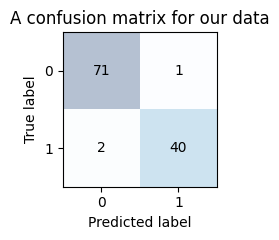

In [121]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

ax.xaxis.set_ticks_position('bottom')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('A confusion matrix for our data')
plt.tight_layout()
#plt.savefig('figures/06_09.png', dpi=300)
plt.show()

**Additional Note**

Remember that we previously encoded the class labels so that malignant examples are the `"postive" class (1)`, and benign examples are the `"negative" class (0)`:

In [122]:
le.transform(['M', 'B'])

array([1, 0])

In [123]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[71  1]
 [ 2 40]]


Note that the (true) class 0 examples that are correctly predicted as class 0 (true negatives) are now in the upper left corner of the matrix (index 0, 0). In order to change the ordering so that the true negatives are in the lower right corner (index 1,1) and the true positves are in the upper left, we can use the labels argument like shown below:

In [124]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=[1, 0])
print(confmat)

[[40  2]
 [ 1 71]]


- Assuming that `class 1 (malignant)` is the positive class in this example, our model correctly classified `71` of the examples that belong to `class 0 (TN)` and `40` examples that belong to `class 1 (TP)`, respectively.

- However, our model also incorrectly misclassified two examples from `class 1` as `class 0 (FN)`, and it predicted that one example is malignant although it is a `benign tumor (FP)`. In the next subsection, we will learn how we can use this information to calculate various error metrics.

## **Optimizing the precision and recall of a classification model**

### **Precision, Recall, and F1-Score**

These are fundamental metrics used to evaluate **classification models**, especially in **imbalanced datasets** or scenarios where false positives and false negatives have different consequences.


### **1. Fundamental Definitions**

Given a **confusion matrix**:

|                     | Predicted Positive  | Predicted Negative  |
| ------------------- | ------------------- | ------------------- |
| **Actual Positive** | True Positive (TP)  | False Negative (FN) |
| **Actual Negative** | False Positive (FP) | True Negative (TN)  |



#### **Precision (Positive Predictive Value)**

`Precision` measures the proportion of correctly predicted positive observations among all predicted positives.

$$\mathrm{Precision} = \frac{TP}{TP + FP}$$

**Interpretation:**
Out of all instances the model predicted as positive, how many were truly positive?

**Use case:**
When the **cost of false positives** is high — e.g., spam detection (avoid flagging legitimate emails).



#### **Recall (Sensitivity or True Positive Rate)**

`Recall` measures the proportion of correctly predicted positives among all actual positives.

$$\mathrm{Recall} = \frac{TP}{TP + FN}$$

**Interpretation:**
Out of all actual positive cases, how many did the model correctly identify?

**Use case:**
When the **cost of false negatives** is high — e.g., disease detection (don’t miss any real patients).



#### **F1-Score (Harmonic Mean of Precision and Recall)**

`F1` balances `precision` and `recall` by taking their harmonic mean.

$$\mathrm{F1} = 2 \times \frac{\mathrm{Precision} \times \mathrm{Recall}}{\mathrm{Precision} + \mathrm{Recall}}$$

**Interpretation:**
A single metric to evaluate performance when precision and recall are both important.

**Use case:**
When both false positives and false negatives are critical — e.g., fraud detection, information retrieval.



### **2. Mathematical Intuition**

* **Precision** favors models with **fewer false positives**.
* **Recall** favors models with **fewer false negatives**.
* **F1** penalizes extreme imbalances — if either precision or recall is low, F1 will also be low.



### **3. Trade-off Visualization**

A model’s **decision threshold** affects precision and recall:

* Increasing threshold → higher precision, lower recall.
* Decreasing threshold → higher recall, lower precision.

The **Precision-Recall Curve** visualizes this trade-off.



### **4. Extensions**

* **Macro F1:** Average F1 across all classes equally.
* **Micro F1:** Aggregate TP, FP, FN globally before computing.
* **Weighted F1:** Weighted average by support (number of samples per class).



### **5. When to Use**

| Metric        | When to Use                | Example                     |
| ------------- | -------------------------- | --------------------------- |
| **Precision** | False positives are costly | Email spam detection        |
| **Recall**    | False negatives are costly | Cancer screening            |
| **F1-score**  | Balance between both       | Credit card fraud detection |



#### **Key Takeaway**

Precision, Recall, and F1-score complement **Accuracy**, offering deeper insight into **imbalanced** or **cost-sensitive** classification problems.
They ensure evaluation focuses on **correctly identifying important classes** rather than overall correctness.

---

### **Matthews Correlation Coefficient (MCC)**

The **Matthews Correlation Coefficient (MCC)** is a robust metric that summarizes the quality of **binary classifications**, especially when dealing with **imbalanced datasets**. It measures the correlation between observed and predicted classifications.



### **1. Mathematical Definition**

Given a confusion matrix with:

* True Positives (TP)
* True Negatives (TN)
* False Positives (FP)
* False Negatives (FN)

The MCC is defined as:

$$\mathrm{MCC} = \frac{(TP \times TN) - (FP \times FN)}{\sqrt{(TP + FP)(TP + FN)(TN + FP)(TN + FN)}}$$



### **2. Interpretation**

* **Range:** $$-1 \leq \mathrm{MCC} \leq 1$$

  * $`\mathrm{MCC} = 1`$: Perfect prediction
  * $`\mathrm{MCC} = 0`$: Random prediction
  * $`\mathrm{MCC} = -1`$: Total disagreement between prediction and reality



### **3. Why MCC is Valuable**

Unlike accuracy or F1-score, MCC considers **all four components** `(TP, TN, FP, FN)`, giving a **balanced measure** even when classes are of very different sizes.

It behaves like a **correlation coefficient** between the predicted and actual binary labels.



### **4. Use Cases**

| Domain                | Application                                           | Why MCC is Preferred                              |
| --------------------- | ----------------------------------------------------- | ------------------------------------------------- |
| **Bioinformatics**    | Protein interaction or gene expression classification | Handles class imbalance effectively               |
| **Medical diagnosis** | Rare disease detection                                | Balances both positive and negative cases         |
| **Fraud detection**   | Transaction classification                            | Reflects true model quality even with skewed data |



### **5. Key Takeaway**

MCC provides a **single, interpretable score** summarizing model performance, capturing the balance between all outcomes.
It is **superior to accuracy or F1** when data is **imbalanced**, as it measures the **true correlation** between predicted and actual classifications.


- In contrast to `PRE`, `REC`, and the `F1` score, the `MCC` ranges between `–1` and `1`, and it takes all elements of a confusion matrix into account—for instance, the `F1` score does not involve the `TN`. While the `MCC` values are harder to interpret than the `F1` score, it is regarded as a superior metric


- Those scoring metrics are all implemented in scikit-learn and can be imported from the `sklearn.metrics` module as shown in the following snippet:

In [125]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score, matthews_corrcoef

pre_val = precision_score(y_true=y_test, y_pred=y_pred)
print(f'Precision: {pre_val:.3f}')

Precision: 0.976


In [126]:
rec_val = recall_score(y_true=y_test, y_pred=y_pred)
print(f'Recall: {rec_val:.3f}')

Recall: 0.952


In [127]:
f1_val = f1_score(y_true=y_test, y_pred=y_pred)
print(f'F1: {f1_val:.3f}')

F1: 0.964


In [128]:
mcc_val = matthews_corrcoef(y_true=y_test, y_pred=y_pred)
print(f'MCC: {mcc_val:.3f}')

MCC: 0.943


- Furthermore, we can use a different scoring metric than accuracy in the `GridSearchCV` via the scoring parameter. A complete list of the different values that are accepted by the scoring parameter can be found at [Metrics and scoring: quantifying the quality of predictions](https://scikit-learn.org/stable/modules/model_evaluation.html)

- Remember that the positive class in scikit-learn is the class that is labeled as `class 1`. If we want to specify a different positive label, we can construct our own scorer via the `make_scorer` function, which we can then directly provide as an argument to the scoring parameter in `GridSearchCV` (in this example, using the f1_score as a metric):

In [129]:
from sklearn.metrics import make_scorer

scorer = make_scorer(f1_score, pos_label=0)

c_gamma_range = [0.01, 0.1, 1.0, 10.0]

param_grid = [{'svc__C': c_gamma_range,
               'svc__kernel': ['linear']},
              {'svc__C': c_gamma_range,
               'svc__gamma': c_gamma_range,
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring=scorer,
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9861994953378878
{'svc__C': 10.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


### **Plotting a receiver operating characteristic**

### **Receiver Operating Characteristic (ROC) and Area Under the Curve (AUC) — Deep Dive**


#### **1. Overview**

The **Receiver Operating Characteristic (ROC)** curve is a fundamental tool for evaluating **binary classification models**. It visualizes the **trade-off between sensitivity (recall)** and **specificity (true negative rate)** across different decision thresholds.

The **Area Under the ROC Curve (AUC)** quantifies this trade-off into a **single scalar value**, representing the model’s overall ability to distinguish between positive and negative classes.



#### **2. Core Concepts**

Given a classifier’s output probabilities, we can define:

* **True Positive Rate (TPR or Recall):**
  $$\mathrm{TPR} = \frac{TP}{TP + FN}$$

* **False Positive Rate (FPR):**
  $$\mathrm{FPR} = \frac{FP}{FP + TN}$$

The ROC curve plots:
$`\mathrm{TPR}`$(y-axis) **vs.** $`\mathrm{FPR}`$(x-axis)
for every possible classification threshold.



#### **3. ROC Curve Interpretation**

* The **closer the curve is to the top-left corner**, the better the classifier.
* The **diagonal line** (from (0,0) to (1,1)) represents **random guessing**.
* Curves below the diagonal indicate **inverse predictions** (worse than random).



#### **4. Area Under the Curve (AUC)**

The **ROC AUC** measures the **area under the ROC curve**, quantifying the overall model performance.

$$\mathrm{AUC} = \int_0^1 \mathrm{TPR(FPR)} \, d(\mathrm{FPR})$$

**Interpretation:**

* $`\mathrm{AUC} = 1.0`$ → Perfect classifier
* $`\mathrm{AUC} = 0.5`$ → Random guessing
* $`\mathrm{AUC} < 0.5`$ → Inversely correlated predictions

It can also be interpreted probabilistically as:

> The probability that a randomly chosen positive instance has a higher predicted score than a randomly chosen negative instance.



#### **5. Example**

For a classifier outputting probabilities:

| Threshold | TPR | FPR |
| --------- | --- | --- |
| 0.9       | 0.2 | 0.0 |
| 0.7       | 0.6 | 0.1 |
| 0.5       | 0.8 | 0.2 |
| 0.3       | 0.9 | 0.4 |
| 0.1       | 1.0 | 0.8 |

Plotting (FPR, TPR) pairs gives the ROC curve.
The AUC value would summarize the overall performance, with higher AUC indicating a better model.



#### **6. Use Cases**

| Domain                  | Application             | Why ROC–AUC is Used                                     |
| ----------------------- | ----------------------- | ------------------------------------------------------- |
| **Medical diagnostics** | Disease classification  | Measures ability to balance sensitivity and specificity |
| **Credit scoring**      | Predicting loan default | Captures ranking quality across thresholds              |
| **Spam detection**      | Classifying emails      | Evaluates true vs. false positive trade-offs            |
| **Fraud detection**     | Transaction analysis    | Works well with imbalanced datasets                     |



#### **7. Key Takeaways**

* ROC curves **illustrate threshold-independent performance**.
* AUC **summarizes model separability** — how well the model distinguishes classes.
* Useful when comparing models or when class distributions are **imbalanced**.
* Best used when **probabilistic outputs** are available (e.g., logistic regression, SVM with `probability=True`).



**In summary:**
ROC and ROC AUC provide a **comprehensive and threshold-independent** view of a model’s classification power, crucial for assessing real-world trade-offs between sensitivity and false alarms.


- Executing the following code example, we will plot a `ROC curve` of a classifier that only uses two features from the `Breast Cancer Wisconsin` dataset to predict whether a tumor is `benign` or `malignant`. Although we are going to use the same logistic regression pipeline that we defined previously, we are only using two features this time. This is to make the classification task more challenging for the classifier, by withholding useful information contained in the other features, so that the resulting
`ROC curve` becomes visually more interesting. For similar reasons, we are also reducing the number of folds in the `StratifiedKFold` validator to three. The code is as follows:

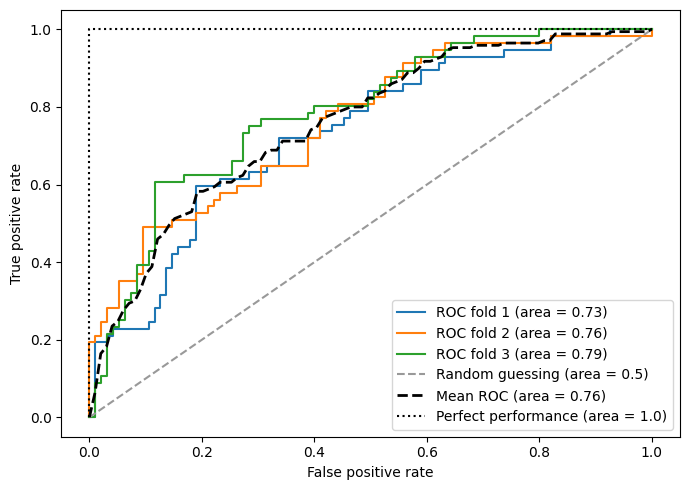

In [132]:
from sklearn.metrics import roc_curve, auc
from numpy import interp


pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(penalty='l2', 
                                           random_state=1,
                                           solver='lbfgs',
                                           C=100.0))

X_train2 = X_train[:, [4, 14]]


cv = list(StratifiedKFold(n_splits=3).split(X_train, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train2[train],
                         y_train[train]).predict_proba(X_train2[test])

    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label=f'ROC fold {i+1} (area = {roc_auc:.2f})')

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing (area = 0.5)')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label=f'Mean ROC (area = {mean_auc:.2f})', lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance (area = 1.0)')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')

plt.tight_layout()
# plt.savefig('figures/06_10.png', dpi=300)
plt.show()

### **Scoring metrics for multiclass classification**

- Scikit-learn implements macro and micro averaging methods to extend those scoring metrics to multiclass problems via `one-vs-all (OvA)` classification. The micro-average is calculated from the individual `TPs`, `TNs`, `FPs`, and `FNs` of the system.


Here’s a **clear distinction** between **Micro Precision** and **Macro Precision**, including their **mathematical formulations**, **interpretations**, and **use cases** in multi-class classification.


### **1. Micro-Averaged Precision**

#### **Formula**

$$\mathrm{Precision_{micro}} = \frac{\sum_{i=1}^{k} TP_i}{\sum_{i=1}^{k} (TP_i + FP_i)}$$

where

* $`TP_i`$ = True Positives for class *i*
* $`FP_i`$ = False Positives for class *i*
* $`k`$ = Number of classes



#### **Explanation**

* Aggregates **all true positives and false positives** across every class before computing precision.
* Treats **each instance equally**, regardless of which class it belongs to.



#### **Interpretation**

* Focuses on **overall performance** of the classifier.
* Dominated by **majority classes** in imbalanced datasets since it gives more weight to classes with more samples.


#### **Use Cases**

* When **class imbalance** exists and you want to measure **global accuracy**.
* Common in **multi-label** or **imbalanced multi-class** problems (e.g., medical diagnosis, fraud detection).



### **2. Macro-Averaged Precision**

#### **Formula**

$$\mathrm{Precision_{macro}} = \frac{1}{k} \sum_{i=1}^{k} \frac{TP_i}{TP_i + FP_i}$$

where

* $`k`$ = Number of classes



#### **Explanation**

* Computes precision **independently for each class**, then averages the results.
* Each class contributes **equally**, regardless of its frequency in the dataset.



#### **Interpretation**

* Evaluates the model’s ability to perform well **across all classes**.
* Sensitive to **minority classes** — if one class performs poorly, the macro score drops significantly.



#### **Use Cases**

* When **all classes are equally important** (e.g., sentiment analysis: positive, neutral, negative).
* Ideal for **balanced datasets** or when performance across classes matters equally.



### **Summary Table**

| Metric              | Formula                                      | Weighting    | Best For                  | Sensitivity                  |
| ------------------- | -------------------------------------------- | ------------ | ------------------------- | ---------------------------- |
| **Micro Precision** | $`\frac{\sum TP_i}{\sum (TP_i + FP_i)}`$     | By instances | Global performance        | Biased toward majority class |
| **Macro Precision** | $`\frac{1}{k}\sum \frac{TP_i}{TP_i + FP_i}`$ | By class     | Balanced class importance | Sensitive to minority class  |



#### **Key Insight**

* **Micro Precision** → “Overall how many of my positive predictions were correct?”
* **Macro Precision** → “On average, how well did I perform across each class?”


In [133]:
pre_scorer = make_scorer(score_func=precision_score, 
                         pos_label=1, 
                         greater_is_better=True, 
                         average='micro')

### **Dealing with class imbalance**

Class imbalance occurs when one class (majority) significantly outnumbers others (minority), leading to biased models that favor the dominant class. This issue is common in **fraud detection**, **medical diagnosis**, **spam filtering**, and **rare event prediction**.


### **1. Understanding the Problem**

Let the dataset contain:

* Majority class $`C_0`$
* Minority class $`C_1`$

with counts:
$`N_0 \gg N_1`$

A classifier trained on this data may minimize overall error by predicting only $`C_0`$, achieving high accuracy but **poor recall** for $`C_1`$.
Hence, **accuracy becomes misleading**, requiring alternative evaluation and mitigation strategies.



### **2. Evaluation Metrics for Imbalanced Data**

Accuracy fails; instead, use **metrics sensitive to class distribution**:

| Metric                   | Formula                                                                     | Focus                                 |
| ------------------------ | --------------------------------------------------------------------------- | ------------------------------------- |
| **Precision**            | $`\frac{TP}{TP + FP}`$                                                      | Reliability of positive predictions   |
| **Recall (Sensitivity)** | $`\frac{TP}{TP + FN}`$                                                      | Ability to detect positive class      |
| **F1-score**             | $`2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}`$               | Harmonic mean of precision and recall |
| **ROC-AUC**              | Area under ROC curve                                                        | Threshold-independent separability    |
| **PR-AUC**               | Area under Precision–Recall curve                                           | Better for skewed distributions       |
| **MCC**                  | $`\frac{TP \times TN - FP \times FN}{\sqrt{(TP+FP)(TP+FN)(TN+FP)(TN+FN)}}`$ | Balanced correlation metric           |



### **3. Data-Level Approaches**

**(a) Random Undersampling**

* Remove samples from the majority class to balance distribution.
* **Pros:** Simple, quick.
* **Cons:** May discard valuable data, reducing generalization.


**(b) Random Oversampling**

* Replicate minority class samples.
* **Pros:** Preserves minority signal.
* **Cons:** Risk of overfitting due to duplication.


**(c) SMOTE (Synthetic Minority Oversampling Technique)**

* Generates synthetic minority samples using interpolation:
  $`x_{new} = x_i + \lambda (x_{nn} - x_i), \, \lambda \in [0,1]`$
* **Pros:** Creates diverse synthetic samples.
* **Cons:** May create noisy or overlapping samples if classes are not well separated.


**(d) ADASYN (Adaptive Synthetic Sampling)**

* Variant of SMOTE that generates more samples where minority data is harder to learn.


**(e) Hybrid Methods**

* Combine oversampling (SMOTE) with undersampling to optimize balance.



### **4. Algorithm-Level Approaches**

**(a) Class Weighting**

* Modify loss functions to penalize misclassification of minority class more heavily:
  $`\mathrm{Loss} = - w_1 y \log(\hat{y}) - w_0 (1 - y) \log(1 - \hat{y})`$
* Example: `LogisticRegression(class_weight='balanced')`
* **Pros:** No data modification.
* **Cons:** Requires tuning of weight ratios.

**(b) Cost-Sensitive Learning**

* Introduce **cost matrix** assigning higher penalties for minority misclassifications.
* Used in algorithms like **SVM**, **Decision Trees**, **XGBoost**.

**(c) Ensemble Methods**

* **Balanced Random Forests:** Each tree trained on balanced bootstrap samples.
* **EasyEnsemble / RUSBoost:** Use multiple undersampled subsets to preserve minority information.



### **5. Advanced Techniques**

| Approach                     | Description                                                                        | Example                                        |
| ---------------------------- | ---------------------------------------------------------------------------------- | ---------------------------------------------- |
| **Threshold Tuning**         | Adjust decision threshold from 0.5 to a lower value to favor minority predictions. | `y_pred = (model.predict_proba(X)[:,1] > 0.3)` |
| **Anomaly Detection Models** | Model minority class as anomaly.                                                   | One-Class SVM, Isolation Forest                |
| **Generative Models**        | Use VAEs or GANs to synthesize realistic minority data.                            | `CTGAN`, `SMOTE-GAN`                           |
| **Meta-Learning Approaches** | Train models aware of imbalance through adaptive reweighting.                      | Focal Loss in deep learning                    |



### **6. Model Evaluation Strategies**

**(a) Stratified Cross-Validation**

Ensures class proportions are preserved across folds.

**(b) Confusion Matrix Inspection**

Helps visualize how imbalance affects classification outcomes.

**(c) PR Curve vs. ROC Curve**

* **PR curve** preferred when **positive class is rare**, as it focuses on minority precision-recall trade-offs.



### **7. Example Workflow**

1. **Diagnose imbalance:**

   ```python
   df['label'].value_counts(normalize=True)
   ```

2. **Apply SMOTE:**

   ```python
   from imblearn.over_sampling import SMOTE
   X_res, y_res = SMOTE().fit_resample(X, y)
   ```

3. **Train weighted model:**

   ```python
   model = LogisticRegression(class_weight='balanced')
   model.fit(X_res, y_res)
   ```

4. **Evaluate with F1 and ROC-AUC:**

   ```python
   from sklearn.metrics import f1_score, roc_auc_score
   f1_score(y_test, y_pred), roc_auc_score(y_test, y_prob)
   ```



### **8. Key Takeaways**

| Strategy                                    | Ideal When                      | Goal                                |
| ------------------------------------------- | ------------------------------- | ----------------------------------- |
| **Resampling (SMOTE/Under/Over)**           | Data imbalance is severe        | Adjust data distribution            |
| **Class weights / Cost-sensitive learning** | Model supports weighting        | Penalize wrong minority predictions |
| **Threshold tuning**                        | Precision–recall balance needed | Shift bias toward minority          |
| **PR-AUC evaluation**                       | Minority class is rare          | Measure actual minority performance |



#### **Final Insight**

Dealing with class imbalance requires combining **proper evaluation metrics**, **resampling**, and **cost-sensitive modeling**.
The key is **not to force equal class sizes**, but to **balance the learning influence** of each class so the model can generalize effectively to both majority and minority instances.

--

- let’s create an imbalanced dataset from our dataset, which originally consisted of `357 benign tumors (class 0)` and `212 malignant tumors (class 1)`:

In [134]:
X_imb = np.vstack((X[y == 0], X[y == 1][:40]))
y_imb = np.hstack((y[y == 0], y[y == 1][:40]))

In [136]:
X_imb.shape, y_imb.shape

((397, 30), (397,))

In [171]:
df['y'].value_counts()

y
B    357
M    212
Name: count, dtype: int64

In [176]:
from collections import Counter

counts = Counter(y_imb)
print(counts)

Counter({np.int64(0): 357, np.int64(1): 40})


In [184]:
X_imb[y_imb == 1].shape[0], X_imb[y_imb == 0].shape[0]

(40, 357)

- In this code snippet, we took all `357 benign` tumor examples and stacked them with the first `40 malignant` examples to create a stark class imbalance. If we were to compute the accuracy of a model that always predicts the majority class `(benign, class 0)`, we would achieve a prediction accuracy of approximately 90 percent:

In [178]:
y_pred = np.zeros(y_imb.shape[0])
print(np.mean(y_pred == y_imb) * 100)

89.92443324937027


- Thus, when we fit classifiers on such datasets, it would make sense to focus on other metrics than accuracy when comparing different models, such as `precision`, `recall`, the `ROC curve`—whatever we care most about in our application. For instance, our priority might be to identify the majority of patients with malignant cancer to recommend an additional screening, so recall should be our metric of choice. In spam filtering, where we don’t want to label emails as spam if the system is not very certain,
precision might be a more appropriate metric.


- Aside from evaluating machine learning models, `class imbalance` influences a learning algorithm during model fitting itself. Since machine learning algorithms typically optimize a reward or loss function that is computed as a sum over the training examples that it sees during fitting, the decision rule is likely going to be biased toward the majority class.


- In other words, the algorithm implicitly learns a model that optimizes the predictions based on the most abundant class in the dataset to minimize the loss or maximize the reward during training.


- One way to deal with imbalanced class proportions during model fitting is to assign a larger penalty to wrong predictions on the minority class. Via scikit-learn, adjusting such a penalty is as convenient as setting the `class_weight` parameter to `class_weight='balanced'`, which is implemented for most classifiers.


- Other popular strategies for dealing with class imbalance include `upsampling` the minority class, `downsampling` the majority class, and the `generation of synthetic training examples`. Unfortunately, there’s no universally best solution or technique that works best across different problem domains. Thus, in practice, it is recommended to try out different strategies on a given problem, evaluate the results, and choose the technique that seems most appropriate.

- The scikit-learn library implements a simple resample function that can help with the upsampling of the minority class by drawing new samples from the dataset with replacement. The following code will take the minority class from our imbalanced Breast Cancer Wisconsin dataset (here, `class 1`) and repeatedly draw new samples from it until it contains the same number of examples as `class label 0`:

In [179]:
from sklearn.utils import resample

print('Number of class 1 examples before:', X_imb[y_imb == 1].shape[0])

X_upsampled, y_upsampled = resample(X_imb[y_imb == 1],
                                    y_imb[y_imb == 1],
                                    replace=True,
                                    n_samples=X_imb[y_imb == 0].shape[0],
                                    random_state=123)

print('Number of class 1 examples after:', X_upsampled.shape[0])

Number of class 1 examples before: 40
Number of class 1 examples after: 357


- After resampling, we can then stack the original `class 0` samples with the upsampled `class 1` subset to obtain a balanced dataset as follows:

In [185]:
X_bal = np.vstack((X[y == 0], X_upsampled))
y_bal = np.hstack((y[y == 0], y_upsampled))

In [187]:
X_bal.shape, y_bal.shape

((714, 30), (714,))

- Consequently, a majority vote prediction rule would only achieve 50 percent accuracy:

In [189]:
y_pred = np.zeros(y_bal.shape[0])
print(np.mean(y_pred == y_bal) * 100)

50.0


- Similarly, we could downsample the majority class by removing training examples from the dataset. To perform downsampling using the resample function, we could simply swap the `class 1` label with `class 0` in the previous code example and vice versa.